### **1. Import Libraries**

Import the required libraries for data manipulation, visualization, preprocessing, and model building.


In [1]:
# write your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

### **2. Download and Load the Dataset**

Download the `train.xl` and `test.xl` from the [zenodo](https://zenodo.org/records/45735) dataset. Load the training and test datasets into pandas DataFrames. Display the first few rows of the training dataset and print the list of columns present in the dataset.

**Note:** Make sure the path is correct while loading the dataset

In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.xlsx to train (1).xlsx


In [3]:
from google.colab import files
uploaded = files.upload()


Saving test.xlsx to test.xlsx


In [5]:
from google.colab import files
uploaded = files.upload()

Saving train.xlsx to train.xlsx


In [8]:
# write your code
import pandas as pd
train_data = pd.read_excel('train.xlsx')
test_data = pd.read_excel('test.xlsx')
# Display the first few rows of the training dataset and print the list of columns present in the dataset
print(train_data.head())
print(train_data.columns)


  Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1         

### **3. Data Cleaning**

#### **3.1 Drop Unnecessary Columns**

- Drop the `Unnamed: 0` column from the both training and test datasets.
- Drop the `DOJ`, `DOL`, `Designation`, and `JobCity` columns from the training dataset as these columns are not present in the test dataset.
- Drop the `Salary` column from the test dataset as it contains no real values, only `?`.

In [9]:
# write your code
# Drop unnecessary columns
train_data = train_data.drop(columns=['Unnamed: 0'])
test_data = test_data.drop(columns=['Unnamed: 0'])
train_data = train_data.drop(columns=['DOJ', 'DOL', 'Designation', 'JobCity'])
test_data = test_data.drop(columns=['Salary'])
print("Training dataset columns after cleaning:")
print(train_data.columns)
print("\nTest dataset columns after cleaning:")
print(test_data.columns)


Training dataset columns after cleaning:
Index(['ID', 'Salary', 'Gender', 'DOB', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

Test dataset columns after cleaning:
Index(['ID', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logica

#### **3.2 Remove Non-Predictive Columns**

Drop columns that are unlikely to influence the target variable (i.e., 'Salary'). Columns like `10board`, `12board`, `CollegeID`, `CollegeTier`, `CollegeCityID`, `CollegeCityTier`, and `CollegeState` are less likely to influence the salary of a candidate.

**Note:** You can always try to include these columns and see if it improves the model performance.

In [10]:
# write your code
# List of columns to drop from both datasets
non_predictive_columns = [
    '10board', '12board', 'CollegeID',
    'CollegeTier', 'CollegeCityID',
    'CollegeCityTier', 'CollegeState'
]
train_data = train_data.drop(columns=non_predictive_columns, errors='ignore')
test_data = test_data.drop(columns=non_predictive_columns, errors='ignore')
# Display the updated column lists
print("Training dataset columns after removing non-predictive columns:")
print(train_data.columns)
print("\nTest dataset columns after removing non-predictive columns:")
print(test_data.columns)


Training dataset columns after removing non-predictive columns:
Index(['ID', 'Salary', 'Gender', 'DOB', '10percentage', '12graduation',
       '12percentage', 'Degree', 'Specialization', 'collegeGPA',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

Test dataset columns after removing non-predictive columns:
Index(['ID', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '12graduation', '12percentage', 'Degree',
       'Specialization', 'collegeGPA', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscienti

#### **3.3 Set Index**

Optionally set the `ID` column as the index for the training and test datasets as it is unique for each row. Use the `set_index` method to do this.


In [11]:
# write your code
# Set the 'ID' column as the index
train_data = train_data.set_index('ID', drop=True)
test_data = test_data.set_index('ID', drop=True)
print("Training dataset after setting 'ID' as index:")
print(train_data.head())
print("\nTest dataset after setting 'ID' as index:")
print(test_data.head())


Training dataset after setting 'ID' as index:
         Salary Gender        DOB  10percentage  12graduation  12percentage  \
ID                                                                            
203097   420000      f 1990-02-19          84.3          2007          95.8   
579905   500000      m 1989-10-04          85.4          2007          85.0   
810601   325000      f 1992-08-03          85.0          2010          68.2   
267447  1100000      m 1989-12-05          85.6          2007          83.6   
343523   200000      m 1991-02-27          78.0          2008          76.8   

             Degree                             Specialization  collegeGPA  \
ID                                                                           
203097  B.Tech/B.E.                       computer engineering       78.00   
579905  B.Tech/B.E.  electronics and communication engineering       70.06   
810601  B.Tech/B.E.                     information technology       70.00   
267447  B.

#### **3.4 Check for Missing Values**

- Check if there are any `Null` values in the dataset using the `info` method.
- Identify invalid values such as `-1` and `0` in the dataset using boolean indexing (i.e., `df[df == -1].count()` and `df[df == 0].count()`).

In [12]:
# write your code
# Check for missing values using the info method
print("Training dataset information:")
print(train_data.info())
print("\nTest dataset information:")
print(test_data.info())
print("\nMissing values in training dataset:")
print(train_data.isnull().sum())
print("\nMissing values in test dataset:")
print(test_data.isnull().sum())
print("\nInvalid (-1) values in training dataset:")
print((train_data == -1).sum())
print("\nInvalid (0) values in training dataset:")
print((train_data == 0).sum())
print("\nInvalid (-1) values in test dataset:")
print((test_data == -1).sum())
print("\nInvalid (0) values in test dataset:")
print((test_data == 0).sum())


Training dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, 203097 to 324966
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   Gender                 3998 non-null   object        
 2   DOB                    3998 non-null   datetime64[ns]
 3   10percentage           3998 non-null   float64       
 4   12graduation           3998 non-null   int64         
 5   12percentage           3998 non-null   float64       
 6   Degree                 3998 non-null   object        
 7   Specialization         3998 non-null   object        
 8   collegeGPA             3998 non-null   float64       
 9   GraduationYear         3998 non-null   int64         
 10  English                3998 non-null   int64         
 11  Logical                3998 non-null   int64         
 12  Quant                  3998 no

#### **3.4 Handle Missing Values**

From the `info` method, we can see that there are no missing values (i.e., `Null` value) in the dataset. But there are some invalid values such as `0` and `-1` in the dataset.

- `GraduationYear` column contains `0` which is an invalid value. Replace the `0` values with the mode of the column, use `SimpleImputer` class from the `sklearn.impute` module.
- The following columns contain `-1` which is an invalid value:
    - `Domain`
    - `ComputerProgramming`
    - `ElectronicsAndSemicon`
    - `ComputerScience`
    - `MechanicalEngg`
    - `ElectricalEngg`
    - `TelecomEngg`
    - `CivilEngg`
    
    From the dataset description, we know that `Domain` column was calculated using the `ComputerProgramming`, `ElectronicsAndSemicon`, `ComputerScience`, `MechanicalEngg`, `ElectricalEngg`, `TelecomEngg`, and `CivilEngg` columns. So, we can drop all these columns and keep only the `Domain` column.
- But the `Domain` column also contains `-1` values. Now replace the `-1` values in the `Domain` column using one of the following methods:
    - Drop the rows containing `-1` values in the `Domain` column.
    - Replace the `-1` values in the `Domain` column with the mean, median, or mode of the column using the `SimpleImputer` class from the `sklearn.impute` module.
    - Use any other method to replace the `-1` values in the `Domain` column (e.g., Using KNNImputer, IterativeImputer, etc.).

In [13]:
# write your code
from sklearn.impute import SimpleImputer
# Handle 'GraduationYear' column
grad_year_imputer = SimpleImputer(strategy='most_frequent')
train_data['GraduationYear'] = grad_year_imputer.fit_transform(train_data[['GraduationYear']])
test_data['GraduationYear'] = grad_year_imputer.transform(test_data[['GraduationYear']])
print("Replaced 0 in GraduationYear with the mode.")
columns_to_drop = [
    'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
    'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'
]
train_data = train_data.drop(columns=columns_to_drop, errors='ignore')
test_data = test_data.drop(columns=columns_to_drop, errors='ignore')
print(f"Dropped columns: {columns_to_drop}")
domain_imputer = SimpleImputer(strategy='mean')
train_data['Domain'] = domain_imputer.fit_transform(train_data[['Domain']])
test_data['Domain'] = domain_imputer.transform(test_data[['Domain']])
print("Replaced -1 in Domain with the mean of the column.")
print("\nTraining dataset after handling missing and invalid values:")
print(train_data.head())
print("\nTest dataset after handling missing and invalid values:")
print(test_data.head())


Replaced 0 in GraduationYear with the mode.
Dropped columns: ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
Replaced -1 in Domain with the mean of the column.

Training dataset after handling missing and invalid values:
         Salary Gender        DOB  10percentage  12graduation  12percentage  \
ID                                                                            
203097   420000      f 1990-02-19          84.3          2007          95.8   
579905   500000      m 1989-10-04          85.4          2007          85.0   
810601   325000      f 1992-08-03          85.0          2010          68.2   
267447  1100000      m 1989-12-05          85.6          2007          83.6   
343523   200000      m 1991-02-27          78.0          2008          76.8   

             Degree                             Specialization  collegeGPA  \
ID                                                             

#### **3.5 Derive New Features**

- The `DOB` column is given in the timestamp format. Create a new column `BirthYear` by extracting the year from the `DOB` column using the `dt` accessor. Remove the `DOB` column from the dataset.
- Now, `BirthYear` column is not a good predictor for the salary. But we can use the `BirthYear`, `12graduation`, and `GraduationYear` columns to calculate the age of the candidate when he/she graduated from High School and College. That might be a good predictor for the salary as from the two age we may determine if the candidate is a prodigy or not, dropout or not, etc.
    - Calculate the `12GradAge` by subtracting the `12graduation` from the `BirthYear`.
    - Calculate the `GradAge` by subtracting the `GraduationYear` from the `BirthYear`.
    - Drop the `12graduation`, and `GraduationYear` columns from the training and test datasets.

In [14]:
# write your code
# Convert the 'DOB' column to datetime format if it's not already
train_data['DOB'] = pd.to_datetime(train_data['DOB'])
test_data['DOB'] = pd.to_datetime(test_data['DOB'])
train_data['BirthYear'] = train_data['DOB'].dt.year
test_data['BirthYear'] = test_data['DOB'].dt.year
train_data = train_data.drop(columns=['DOB'])
test_data = test_data.drop(columns=['DOB'])
print("Extracted 'BirthYear' and removed 'DOB' column.")
train_data['12GradAge'] = train_data['12graduation'] - train_data['BirthYear']
test_data['12GradAge'] = test_data['12graduation'] - test_data['BirthYear']
train_data['GradAge'] = train_data['GraduationYear'] - train_data['BirthYear']
test_data['GradAge'] = test_data['GraduationYear'] - test_data['BirthYear']
print("Calculated '12GradAge' and 'GradAge'.")
columns_to_drop = ['12graduation', 'GraduationYear']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")
print("\nTraining dataset after deriving new features:")
print(train_data.head())

print("\nTest dataset after deriving new features:")
print(test_data.head())


Extracted 'BirthYear' and removed 'DOB' column.
Calculated '12GradAge' and 'GradAge'.
Dropped columns: ['12graduation', 'GraduationYear']

Training dataset after deriving new features:
         Salary Gender  10percentage  12percentage       Degree  \
ID                                                                
203097   420000      f          84.3          95.8  B.Tech/B.E.   
579905   500000      m          85.4          85.0  B.Tech/B.E.   
810601   325000      f          85.0          68.2  B.Tech/B.E.   
267447  1100000      m          85.6          83.6  B.Tech/B.E.   
343523   200000      m          78.0          76.8  B.Tech/B.E.   

                                   Specialization  collegeGPA  English  \
ID                                                                       
203097                       computer engineering       78.00      515   
579905  electronics and communication engineering       70.06      695   
810601                     information technology

#### **3.6 Simplify Categorical Data**

Map `Specialization` column to following categories:

- 'CS' for Computer Science
- 'EC' for Electronics
- 'ME' for Mechanical
- 'EL' for Electrical
- 'CE' for Civil
- 'other' for other specializations

Use the dictionary given below to map the specializations to the categories using the `map` method.

```python
specialization_map = {
    "electronics and communication engineering": "EC",
    "computer science & engineering": "CS",
    "information technology": "CS",
    "computer engineering": "CS",
    "computer application": "CS",
    "mechanical engineering": "ME",
    "electronics and electrical engineering": "EC",
    "electronics & telecommunications": "EC",
    "electrical engineering": "EL",
    "electronics & instrumentation eng": "EC",
    "civil engineering": "CE",
    "electronics and instrumentation engineering": "EC",
    "information science engineering": "CS",
    "instrumentation and control engineering": "EC",
    "electronics engineering": "EC",
    "biotechnology": "other",
    "other": "other",
    "industrial & production engineering": "other",
    "chemical engineering": "other",
    "applied electronics and instrumentation": "EC",
    "computer science and technology": "CS",
    "telecommunication engineering": "EC",
    "mechanical and automation": "ME",
    "automobile/automotive engineering": "ME",
    "instrumentation engineering": "EC",
    "mechatronics": "ME",
    "electronics and computer engineering": "CS",
    "aeronautical engineering": "ME",
    "computer science": "CS",
    "metallurgical engineering": "other",
    "biomedical engineering": "other",
    "industrial engineering": "other",
    "information & communication technology": "EC",
    "electrical and power engineering": "EL",
    "industrial & management engineering": "other",
    "computer networking": "CS",
    "embedded systems technology": "EC",
    "power systems and automation": "EL",
    "computer and communication engineering": "CS",
    "information science": "CS",
    "internal combustion engine": "ME",
    "ceramic engineering": "other",
    "mechanical & production engineering": "ME",
    "control and instrumentation engineering": "EC",
    "polymer technology": "other",
    "electronics": "EC",
}
```

In [15]:
# write your code
# Define the specialization mapping dictionary
specialization_map = {
    "electronics and communication engineering": "EC",
    "computer science & engineering": "CS",
    "information technology": "CS",
    "computer engineering": "CS",
    "computer application": "CS",
    "mechanical engineering": "ME",
    "electronics and electrical engineering": "EC",
    "electronics & telecommunications": "EC",
    "electrical engineering": "EL",
    "electronics & instrumentation eng": "EC",
    "civil engineering": "CE",
    "electronics and instrumentation engineering": "EC",
    "information science engineering": "CS",
    "instrumentation and control engineering": "EC",
    "electronics engineering": "EC",
    "biotechnology": "other",
    "other": "other",
    "industrial & production engineering": "other",
    "chemical engineering": "other",
    "applied electronics and instrumentation": "EC",
    "computer science and technology": "CS",
    "telecommunication engineering": "EC",
    "mechanical and automation": "ME",
    "automobile/automotive engineering": "ME",
    "instrumentation engineering": "EC",
    "mechatronics": "ME",
    "electronics and computer engineering": "CS",
    "aeronautical engineering": "ME",
    "computer science": "CS",
    "metallurgical engineering": "other",
    "biomedical engineering": "other",
    "industrial engineering": "other",
    "information & communication technology": "EC",
    "electrical and power engineering": "EL",
    "industrial & management engineering": "other",
    "computer networking": "CS",
    "embedded systems technology": "EC",
    "power systems and automation": "EL",
    "computer and communication engineering": "CS",
    "information science": "CS",
    "internal combustion engine": "ME",
    "ceramic engineering": "other",
    "mechanical & production engineering": "ME",
    "control and instrumentation engineering": "EC",
    "polymer technology": "other",
    "electronics": "EC",
}

train_data['Specialization'] = train_data['Specialization'].map(specialization_map).fillna('other')
test_data['Specialization'] = test_data['Specialization'].map(specialization_map).fillna('other')
print("Training dataset after mapping Specialization column:")
print(train_data[['Specialization']].head())
print("\nTest dataset after mapping Specialization column:")
print(test_data[['Specialization']].head())


Training dataset after mapping Specialization column:
       Specialization
ID                   
203097             CS
579905             EC
810601             CS
267447             CS
343523             EC

Test dataset after mapping Specialization column:
        Specialization
ID                    
664736              EC
1123290             CS
1062444             CS
1072028             CS
267259              CS


#### **3.7 Standardize the GPA Scale**

From the data description, we can see that some of the students have GPA on a scale of 10 and some on a scale of 100. We will convert the GPA that are less than 10 to a scale of 100 by multiplying them by 10. Use the binary indexing to update the `collegeGPA` column.

In [16]:
# write your code
# Standardize the GPA scale in the collegeGPA column
train_data.loc[train_data['collegeGPA'] < 10, 'collegeGPA'] *= 10
test_data.loc[test_data['collegeGPA'] < 10, 'collegeGPA'] *= 10
print("Updated 'collegeGPA' column in training dataset:")
print(train_data['collegeGPA'].head())
print("\nUpdated 'collegeGPA' column in test dataset:")
print(test_data['collegeGPA'].head())


Updated 'collegeGPA' column in training dataset:
ID
203097    78.00
579905    70.06
810601    70.00
267447    74.64
343523    73.90
Name: collegeGPA, dtype: float64

Updated 'collegeGPA' column in test dataset:
ID
664736     67.20
1123290    71.10
1062444    80.50
1072028    70.38
267259     71.00
Name: collegeGPA, dtype: float64


#### **3.8 Remove Outliers**

- Draw the boxplot of the `Salary` column to check for outliers. Here, we are doing it only for the `Salary` column. You can do it for other numerical columns as well.

- From the boxplot, you will see that the data points where `Salary` > 10,00,000 are rare, especially in the first job. Remove the data points where `Salary` > 10,00,000 from the training dataset.

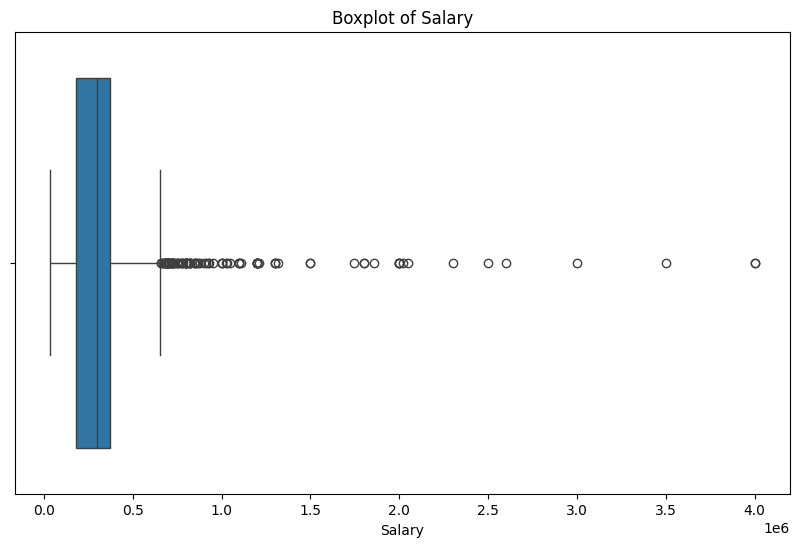

Updated training dataset after removing outliers:
         Salary Gender  10percentage  12percentage       Degree  \
ID                                                                
203097   420000      f         84.30          95.8  B.Tech/B.E.   
579905   500000      m         85.40          85.0  B.Tech/B.E.   
810601   325000      f         85.00          68.2  B.Tech/B.E.   
343523   200000      m         78.00          76.8  B.Tech/B.E.   
1027655  300000      m         89.92          87.0  B.Tech/B.E.   

        Specialization  collegeGPA  English  Logical  Quant    Domain  \
ID                                                                      
203097              CS       78.00      515      585    525  0.635979   
579905              EC       70.06      695      610    780  0.960603   
810601              CS       70.00      615      545    370  0.450877   
343523              EC       73.90      545      625    465  0.124502   
1027655             EC       76.32      56

In [17]:
# write your code
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['Salary'])
plt.title("Boxplot of Salary")
plt.xlabel("Salary")
plt.show()
outlier_threshold = 1000000
train_data = train_data[train_data['Salary'] <= outlier_threshold]
print(f"Updated training dataset after removing outliers:")
print(train_data.head())
print(f"\nNumber of rows remaining: {len(train_data)}")


### **4. Data Preprocessing**

#### **4.1 Encoding Categorical Columns**

- Convert the `Gender` column to numerical values using the `LabelEncoder` class from the `sklearn.preprocessing` module. It will convert each category in the column to a unique integer. Useful when the number of categories is less.

- Convert the `Degree` and `Specialization` columns to numerical values using the `get_dummies` method from the pandas library. It will create one-hot encoded columns for each category in the column. Useful when the number of categories is more, which is the case here.

In [18]:
# write your code
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
test_data['Gender'] = label_encoder.transform(test_data['Gender'])
print("Encoded 'Gender' column using LabelEncoder.")
train_data = pd.get_dummies(train_data, columns=['Degree', 'Specialization'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Degree', 'Specialization'], drop_first=True)

print("One-hot encoded 'Degree' and 'Specialization' columns using get_dummies.")
print("\nTraining dataset after encoding categorical columns:")
print(train_data.head())
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

print("\nTest dataset aligned with training dataset columns:")
print(test_data.head())


Encoded 'Gender' column using LabelEncoder.
One-hot encoded 'Degree' and 'Specialization' columns using get_dummies.

Training dataset after encoding categorical columns:
         Salary  Gender  10percentage  12percentage  collegeGPA  English  \
ID                                                                         
203097   420000       0         84.30          95.8       78.00      515   
579905   500000       1         85.40          85.0       70.06      695   
810601   325000       0         85.00          68.2       70.00      615   
343523   200000       1         78.00          76.8       73.90      545   
1027655  300000       1         89.92          87.0       76.32      560   

         Logical  Quant    Domain  conscientiousness  ...  12GradAge  GradAge  \
ID                                                    ...                       
203097       585    525  0.635979             0.9737  ...         17       21   
579905       610    780  0.960603            -0.7335 

#### **4.2 Scale Numerical Columns**

Scale the numerical columns using the `StandardScaler` class from the `sklearn.preprocessing` module. It will scale the numerical columns to have a mean of 0 and a standard deviation of 1. Don't scale the target variable `Salary`.



In [19]:
# write your code
from sklearn.preprocessing import StandardScaler

numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns.drop('Salary')
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

print("Scaled numerical columns using StandardScaler.")
print("\nTraining dataset after scaling numerical columns:")
print(train_data.head())
print("\nTest dataset after scaling numerical columns:")
print(test_data.head())


Scaled numerical columns using StandardScaler.

Training dataset after scaling numerical columns:
         Salary    Gender  10percentage  12percentage  collegeGPA   English  \
ID                                                                            
203097   420000 -1.780597      0.647954      1.938666    0.855540  0.128773   
579905   500000  0.561609      0.759782      0.957012   -0.219716  1.846585   
810601   325000 -1.780597      0.719117     -0.570005   -0.227842  1.083113   
343523   200000  0.561609      0.007484      0.211682    0.300307  0.415075   
1027655  300000  0.561609      1.219294      1.138800    0.628030  0.558226   

          Logical     Quant    Domain  conscientiousness  ...  12GradAge  \
ID                                                        ...              
203097   0.965219  0.096307  0.268769           0.982968  ...  -0.759962   
579905   1.254031  2.188601  0.961322          -0.679106  ...   0.391020   
810601   0.503119 -1.175479 -0.126127       

### **5. Feature Selection**

Select the features that are important for the model. You can use following methods to select the features:

- **Correlation Matrix:** Find the correlation between the features and the target variable and select the features that have a high correlation with the target variable.
- You can create new features by combining the existing features that can help improve the model's performance. For example:
    - Mutiply two features to create a new feature.
    - Take the square, cube, or square root of a feature to create a new feature.
    - You also can consider log transformation of the features.
    - You can also use the `PolynomialFeatures` class from the `sklearn.preprocessing` module to create new features.
- **Sci-Kit Learn:** Use `SelectKBest`, `SelectPercentile`, `RFE`, `RFECV`, etc. to select the features. You can use any of these methods to select the features. See the documentation of the 'sklearn.feature_selection' module for more information.

**Note:** Bonus credits will be given if you can report which features are the best predictors of the First job annual salary.

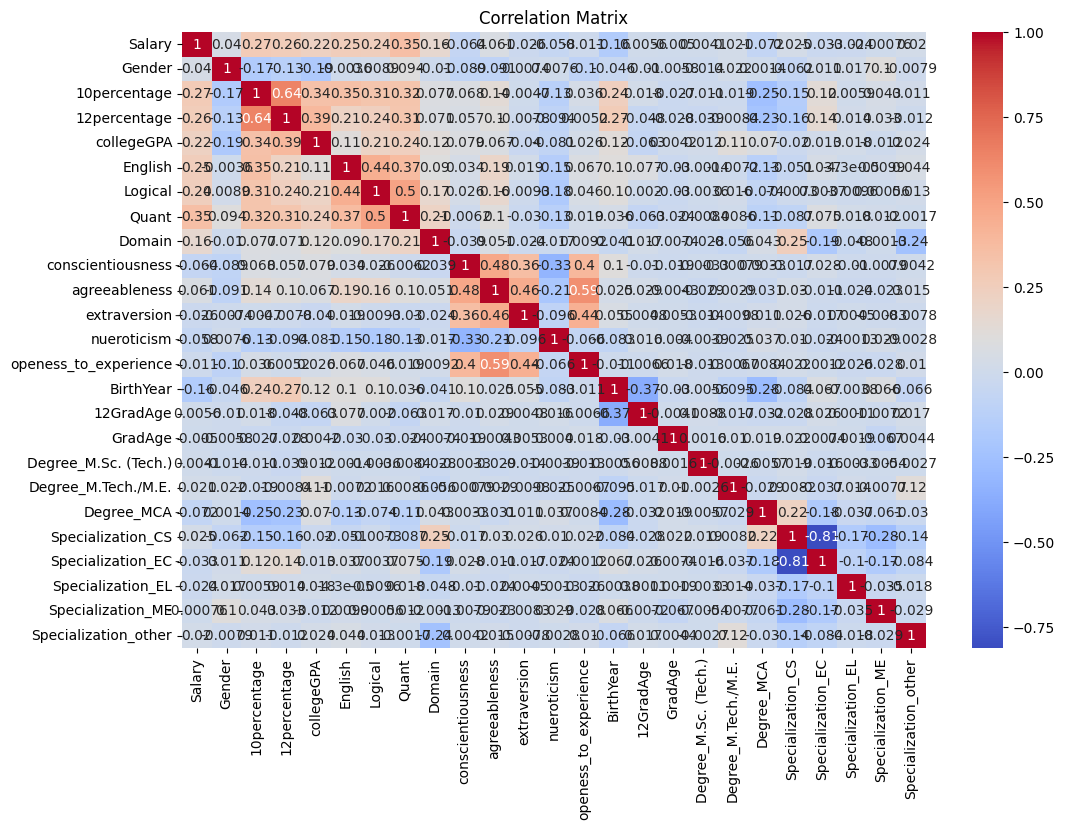

Correlation of features with 'Salary':
Salary                   1.000000
Quant                    0.350994
10percentage             0.274463
12percentage             0.261412
English                  0.250266
Logical                  0.243455
collegeGPA               0.222827
Domain                   0.157611
agreeableness            0.060564
Gender                   0.039916
Specialization_CS        0.024622
Degree_M.Tech./M.E.      0.021122
Specialization_other     0.019995
12GradAge                0.005583
Degree_M.Sc. (Tech.)     0.004079
Specialization_ME       -0.000765
GradAge                 -0.004981
openess_to_experience   -0.011443
Specialization_EL       -0.024415
extraversion            -0.025842
Specialization_EC       -0.032623
nueroticism             -0.057979
conscientiousness       -0.064134
Degree_MCA              -0.071915
BirthYear               -0.162958
Name: Salary, dtype: float64


In [20]:
# write your code
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
correlation_with_target = correlation_matrix['Salary'].sort_values(ascending=False)
print("Correlation of features with 'Salary':")
print(correlation_with_target)


### **6. Gradient Descent for Linear Regression**

#### **6.1 Implement Gradient Descent Methods**

Implement three gradient descent methods: Batch Gradient Descent, Stochastic Gradient Descent, and Mini-Batch Gradient Descent.

**6.1.1 Batch Gradient Descent**
```python
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    # complete the code
    return weights, bias
```

In [40]:
# write your code
import numpy as np

def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    for epoch in range(epochs):
        y_prediction = np.dot(X, weights) + bias
        # Calculating gradients
        dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
        db = -(2 / n_samples) * np.sum(y - y_pred)
        weights -= lr * dw
        bias -= lr * db
        if epoch % 100 == 0:
            loss = np.mean((y - y_pred) ** 2)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, bias


**6.1.2 Stochastic Gradient Descent**
```python
def stochastic_gradient_descent(X, y, lr=0.01, epochs=1000):
    # complete the code
    return weights, bias
```

In [46]:
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):

    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(epochs):

        y_prediction = np.dot(X, weights) + bias

        dw = -(2 / n_samples) * np.dot(X.T, (y - y_prediction))
        db = -(2 / n_samples) * np.sum(y - y_prediction)

        weights -= lr * dw
        bias -= lr * db

        if epoch % 100 == 0:
            loss = np.mean((y - y_prediction) ** 2)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, bias



**6.1.3 Mini-Batch Gradient Descent**
```python
def mini_batch_gradient_descent(X, y, lr=0.01, epochs=1000, batch_size=32):
    # complete the code
    return weights, bias
```

In [42]:
# write your code
import numpy as np

def mini_batch_gradient_descent(X, y, lr=0.01, epochs=1000, batch_size=32):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    for epoch in range(epochs):
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]
        for i in range(0, n_samples, batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            y_pred = np.dot(X_batch, weights) + bias
            dw = -(2 / X_batch.shape[0]) * np.dot(X_batch.T, (y_batch - y_pred))
            db = -(2 / X_batch.shape[0]) * np.sum(y_batch - y_pred)
            weights -= lr * dw
            bias -= lr * db
        if epoch % 100 == 0:
            loss = np.mean((np.dot(X, weights) + bias - y) ** 2)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, bias


### **7. Train and Evaluate Linear Regression Models**

#### **7.1 Train Models**

Split the data into training and validation sets and train using gradient descent methods.

In [31]:
from sklearn.model_selection import train_test_split
import numpy as np


In [43]:
# write your code
X = train_data.drop(columns=['Salary']).values
y = train_data['Salary'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")


Training set size: 3169
Validation set size: 793


In [50]:

print(X_train.dtype)
print(y_train.dtype)

X_train = X_train.astype(float)
y_train = y_train.astype(float)


float64
float64


In [47]:
weights_bgd, bias_bgd = batch_gradient_descent(X_train, y_train, lr=0.01, epochs=1000)
print("Batch Gradient Descent Model Trained.")

Epoch 0, Loss: 104778600820.4481
Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan
Batch Gradient Descent Model Trained.


<ipython-input-46-9c887ff67c27>:14: RuntimeWarning: invalid value encountered in subtract
  weights -= lr * dw


In [48]:
weights_sgd, bias_sgd = stochastic_gradient_descent(X_train, y_train, lr=0.01, epochs=1000)
print("Stochastic Gradient Descent Model Trained.")

<ipython-input-41-dea81ac3d033>:13: RuntimeWarning: invalid value encountered in multiply
  dw = -2 * X[i] * (y[i] - y_pred)


Epoch 0, Loss: nan
Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan
Stochastic Gradient Descent Model Trained.


In [49]:
weights_mbgd, bias_mbgd = mini_batch_gradient_descent(X_train, y_train, lr=0.01, epochs=1000, batch_size=32)
print("Mini-Batch Gradient Descent Model Trained.")

<ipython-input-42-2c5028e05188>:19: RuntimeWarning: invalid value encountered in subtract
  weights -= lr * dw


Epoch 0, Loss: nan
Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan
Mini-Batch Gradient Descent Model Trained.


#### **7.2 Evaluate Models**

Evaluate the models using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared score on the validation set. Display the results for all three gradient descent methods.

In [51]:
# write your code
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [56]:
def evaluate_model(X, y, weights, bias, method_name):

    y_pred = np.dot(X, weights) + bias
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Evaluation Metrics for {method_name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R-squared (R²): {r2:.4f}")
    print()
    return mse, mae, r2


In [54]:

print(X_train.dtype)
X_train = X_train.astype(float)
y_train = y_train.astype(float)


float64


In [57]:
weights_bgd, bias_bgd = batch_gradient_descent(X_train, y_train, lr=0.01, epochs=1000)
print("Batch Gradient Descent Model Trained.")


Epoch 0, Loss: 104778600820.4481
Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan
Batch Gradient Descent Model Trained.


<ipython-input-46-9c887ff67c27>:14: RuntimeWarning: invalid value encountered in subtract
  weights -= lr * dw
